In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Loading the  [House Prices by Small Area](https://https://data.melbourne.vic.gov.au/explore/dataset/house-prices-by-small-area-sale-year/table/) Dataset

In [ ]:

housing_data = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/house-prices-by-small-area-sale-year/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")
house_price = housing_data.copy()
house_price.head()

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258


In [ ]:
# Displaying shape
print("Shape of the dataset:")
print(housing_data.shape)

# Displaying data types
print("\nData types of the dataset:")
print(housing_data.dtypes)

Shape of the dataset:
(347, 5)

Data types of the dataset:
Sale_Year              int64
Small_Area            object
Type                  object
Median_Price         float64
Transaction_Count      int64
dtype: object


In [ ]:
#Finding null and Zero values
null_values = housing_data.isnull().sum()

zero_values = (housing_data == 0).sum()

print("Null values:")
print(null_values)

print("\nZero values:")
print(zero_values)

Null values:
Sale_Year             0
Small_Area            7
Type                  0
Median_Price         28
Transaction_Count     0
dtype: int64

Zero values:
Sale_Year            0
Small_Area           0
Type                 0
Median_Price         5
Transaction_Count    0
dtype: int64


In [ ]:

# Dropping rows with NaN, 0, or NA values
housing_price = house_price.dropna(axis=0, how='any')
housing_price = housing_price.replace(0, pd.NA).dropna()

print("Cleaned dataset shape:", housing_price.shape)
print("\n Cleaned data:")
housing_price



Cleaned dataset shape: (311, 5)

 Cleaned data:


,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258
...,...,...,...,...,...
342,2016,North Melbourne,Residential Apartment,515000.0,231
343,2016,Parkville,House/Townhouse,1761250.0,32
344,2016,Parkville,Residential Apartment,500000.0,63
345,2016,South Yarra,House/Townhouse,2135000.0,34


<Axes: xlabel='Sale_Year', ylabel='Transaction_Count'>

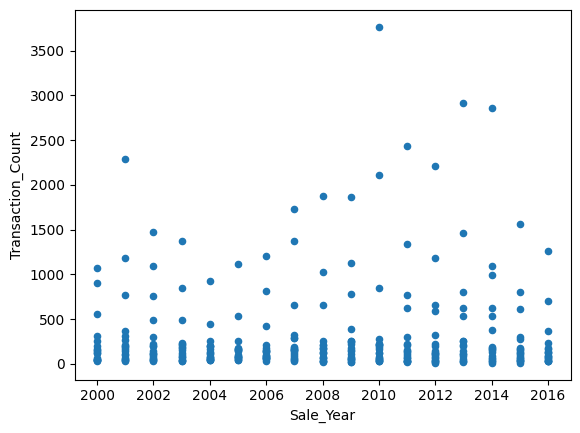

In [ ]:
#@title Number of Transactions that took place each year


from matplotlib import pyplot as plt
housing_price.plot(kind='scatter', x='Sale_Year', y='Transaction_Count')
plt.gca()

# Listing The Suburbs in the Dataset

In [ ]:
# Listing the Suburbs
unique_small_areas = housing_price['Small_Area'].unique()

print("Separate elements:")
for area in unique_small_areas:
    print(area)


Separate elements:
Carlton
East Melbourne
Kensington
Melbourne (CBD)
Melbourne (Remainder)
North Melbourne
Parkville
South Yarra
West Melbourne (Residential)
Southbank
Docklands




---


# Grouping data from the same suburbs together


In [ ]:

suburb_groups = housing_price.groupby('Small_Area')
suburb_datasets = {}  # Initialize an empty dictionary to store datasets for each suburb

for suburb, data in suburb_groups:
    suburb_datasets[suburb] = data.copy()  # Store the dataset for the current suburb in the dictionary

# Now suburb_datasets is a dictionary where each key is a suburb name and each value is the corresponding dataset.







---


# Plotting Median Price of Houses from all the Suburbs with respect to the year in which the House was sold.

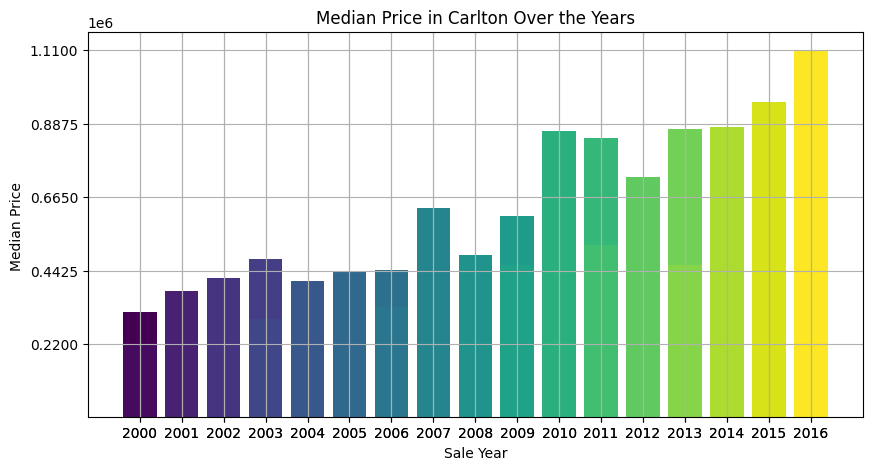

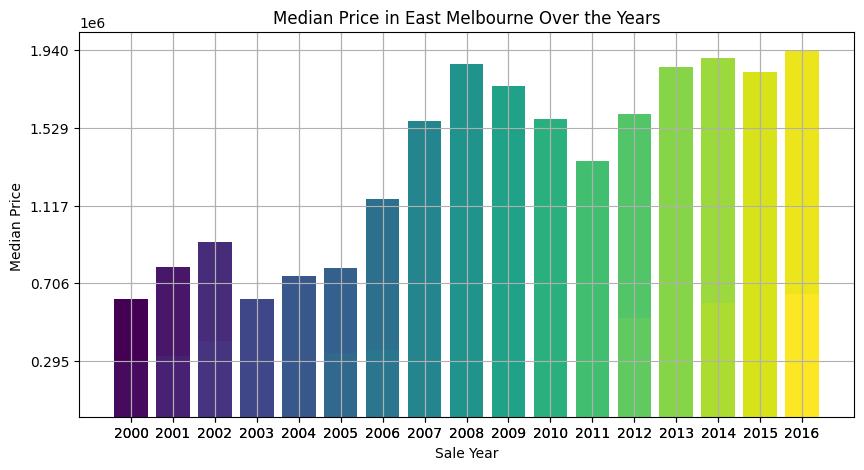

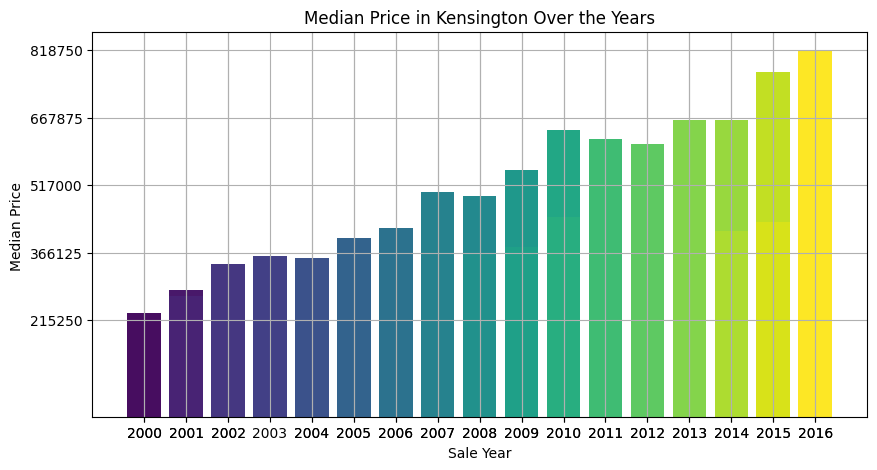

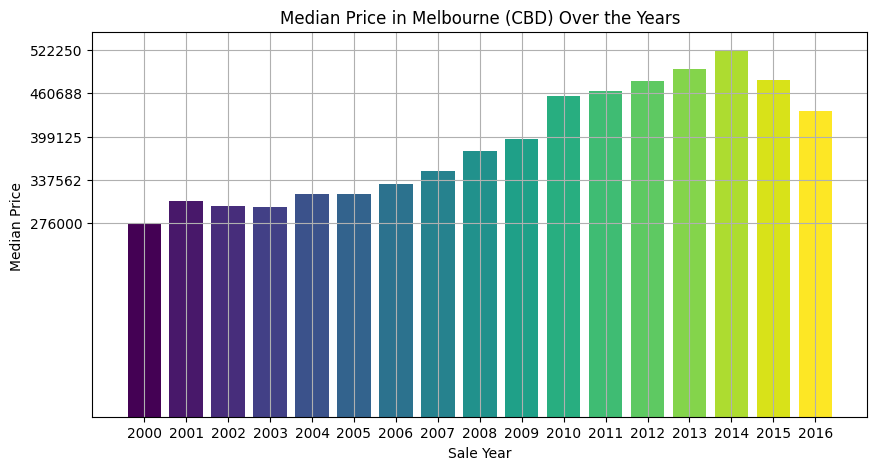

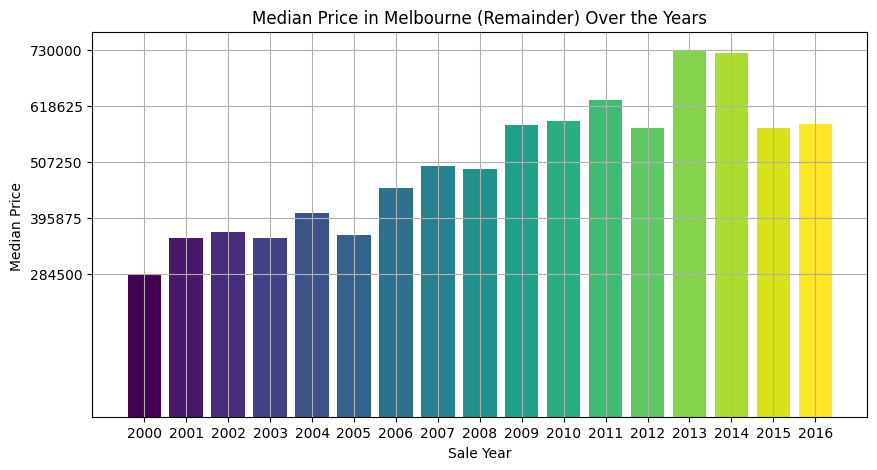

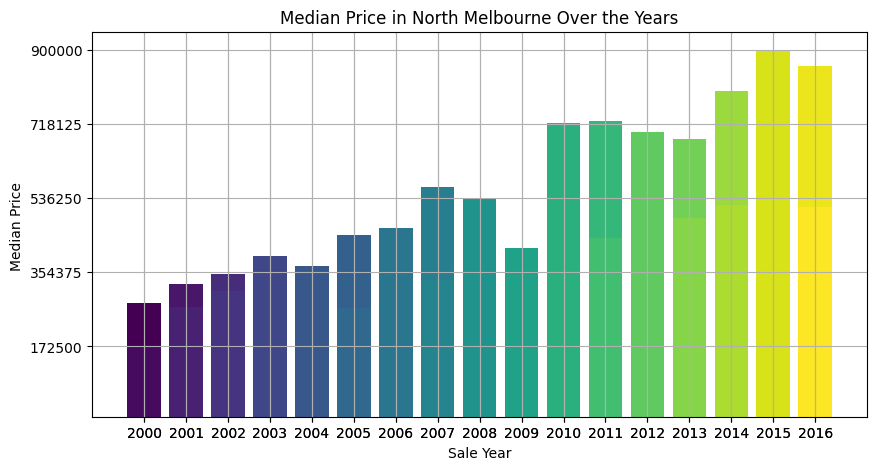

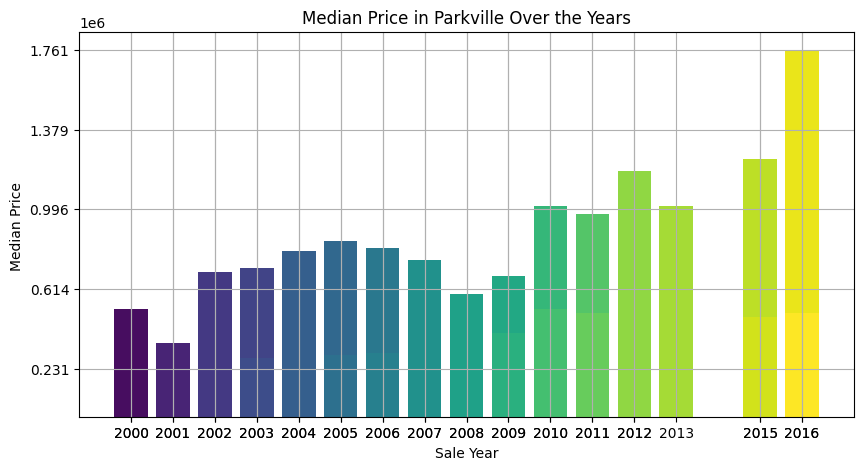

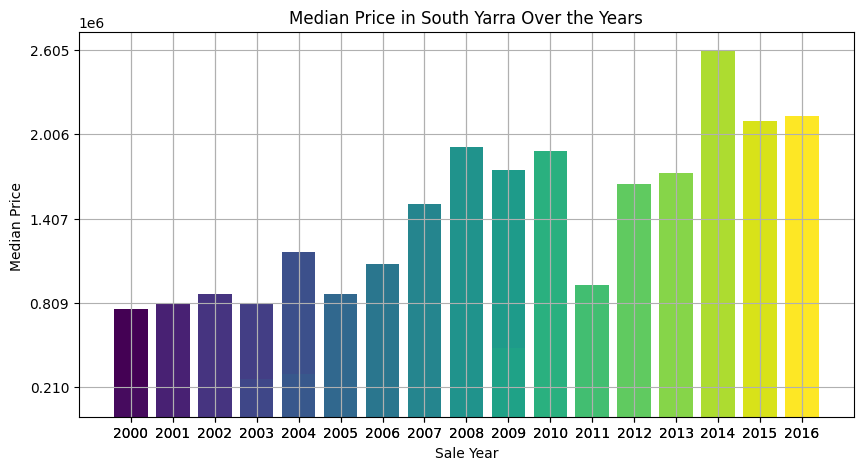

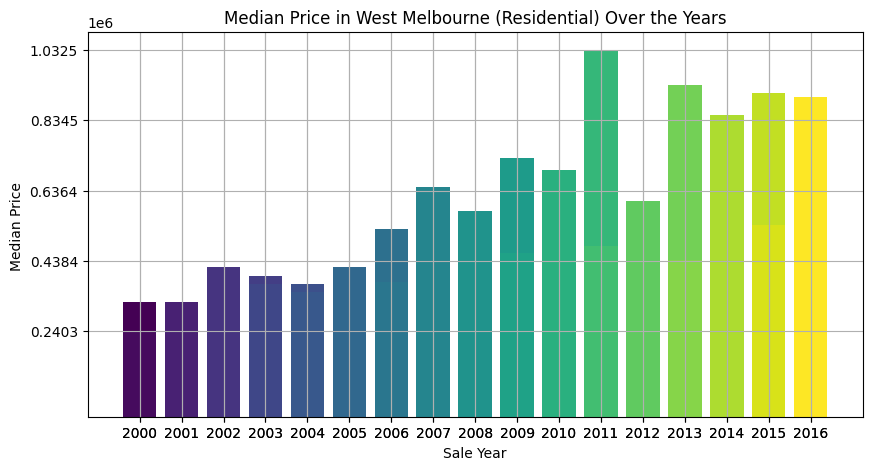

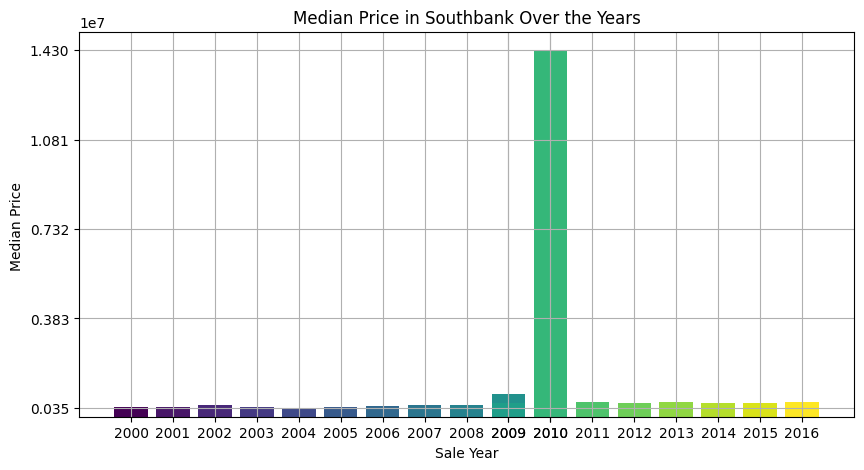

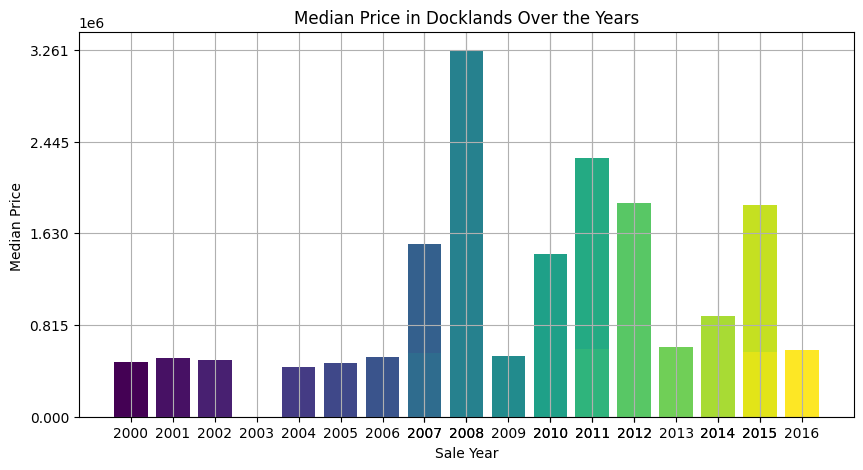

In [ ]:

for suburb_name in unique_small_areas:

    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    plt.figure(figsize=(10, 5))

    # Plotting Median_Price against Sale_Year
    plt.bar(dataset['Sale_Year'], dataset['Median_Price'],  color=plt.cm.viridis(np.linspace(0, 1, len(dataset))))
    plt.title(f'Median Price in {suburb_name} Over the Years')
    plt.xlabel('Sale Year')
    plt.ylabel('Median Price ')
    plt.grid(True)

    plt.xticks(dataset['Sale_Year'])

    median_prices = dataset['Median_Price']
    plt.yticks(np.linspace(median_prices.min(), median_prices.max(), 5))

    plt.show()




---


# Median Price of Houses in each Suburb

In [ ]:

# Create an empty dictionary to store median of median prices for each suburb
median_of_suburbs = {}

# Iterate over each suburb in the unique_small_areas list
for suburb_name in unique_small_areas:
    # Select the dataset for the current suburb and sort it by 'Sale_Year'
    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    # Calculate the median of the 'Median_Price' column for the current suburb
    sub_median_price = np.median(dataset['Median_Price'])

    # Store the result in the dictionary with suburb name as key
    median_of_suburbs[suburb_name] = sub_median_price

# Print the median of median prices for each suburb
for suburb_name, median in median_of_suburbs.items():
    print(f" Median Price of Housing in {suburb_name}: {median}")


 Median Price of Housing in Carlton: 452500.0
 Median Price of Housing in East Melbourne: 663750.0
 Median Price of Housing in Kensington: 415000.0
 Median Price of Housing in Melbourne (CBD): 378000.0
 Median Price of Housing in Melbourne (Remainder): 500000.0
 Median Price of Housing in North Melbourne: 431125.0
 Median Price of Housing in Parkville: 516000.0
 Median Price of Housing in South Yarra: 709250.0
 Median Price of Housing in West Melbourne (Residential): 454500.0
 Median Price of Housing in Southbank: 518800.0
 Median Price of Housing in Docklands: 580000.0


# Median Price of Housing in each Suburb

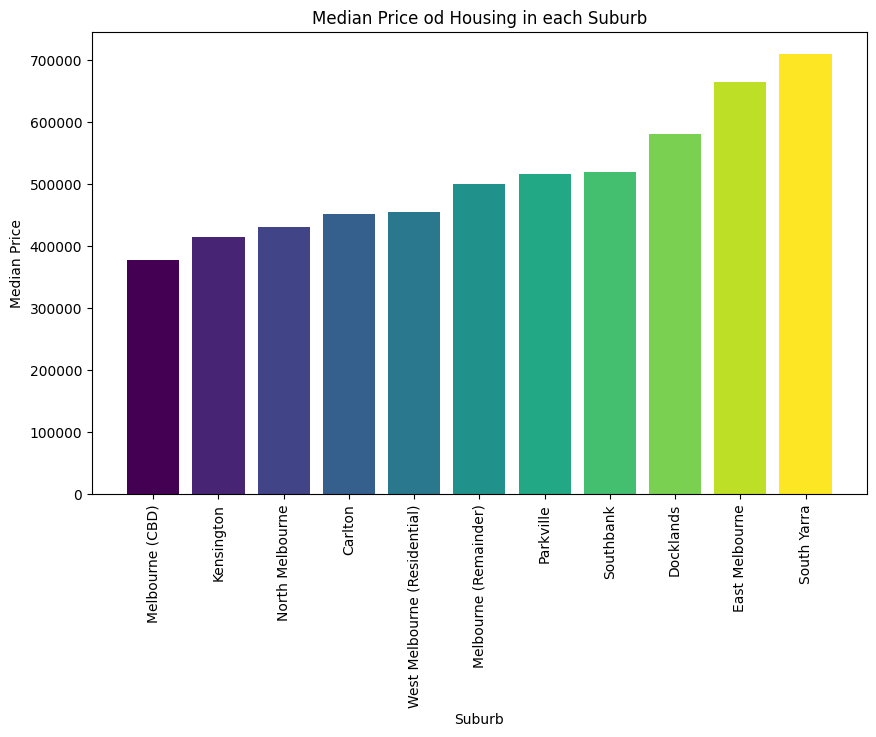

In [ ]:
#Creating DataFrame to store suburb names and their corresponding median prices
median_price_df = pd.DataFrame({'Suburb': list(median_of_suburbs.keys()),
                                'Median_Price': list(median_of_suburbs.values())})

median_price_df = median_price_df.sort_values(by='Median_Price')

# Plotting the median prices
plt.figure(figsize=(10, 6))
plt.bar(median_price_df['Suburb'], median_price_df['Median_Price'], color=plt.cm.viridis(np.linspace(0, 1, len(median_price_df))))
plt.title('Median Price od Housing in each Suburb')
plt.xlabel('Suburb')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.show()


# Number of Property Transactions in each suburb over the years

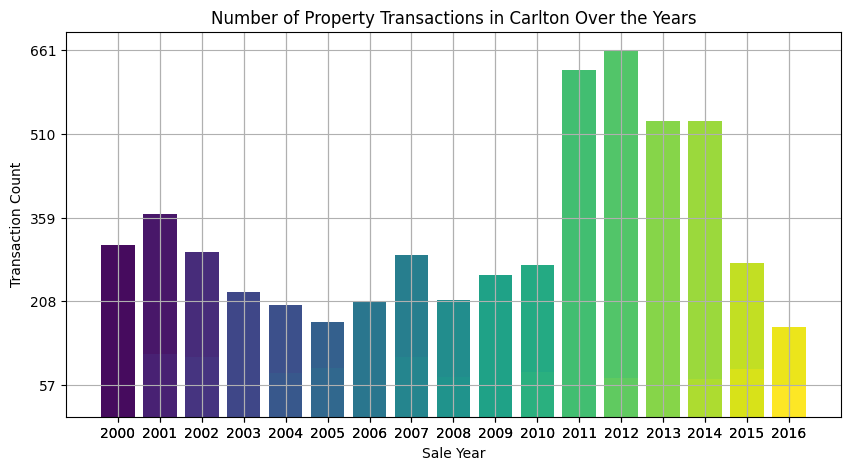

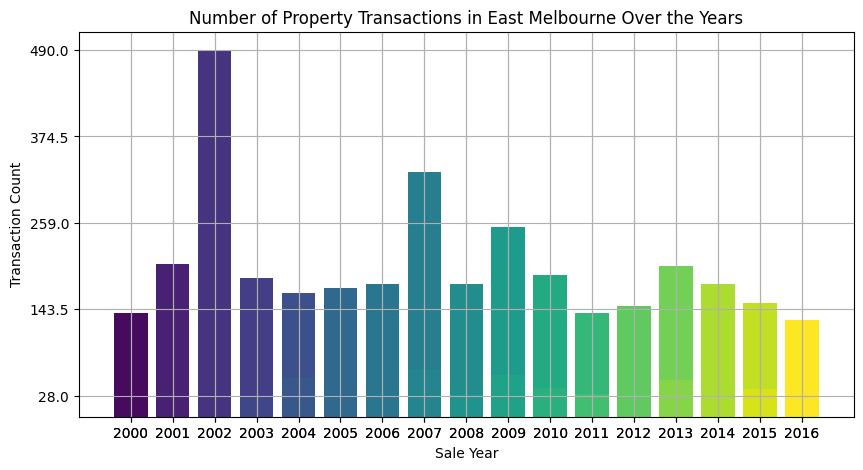

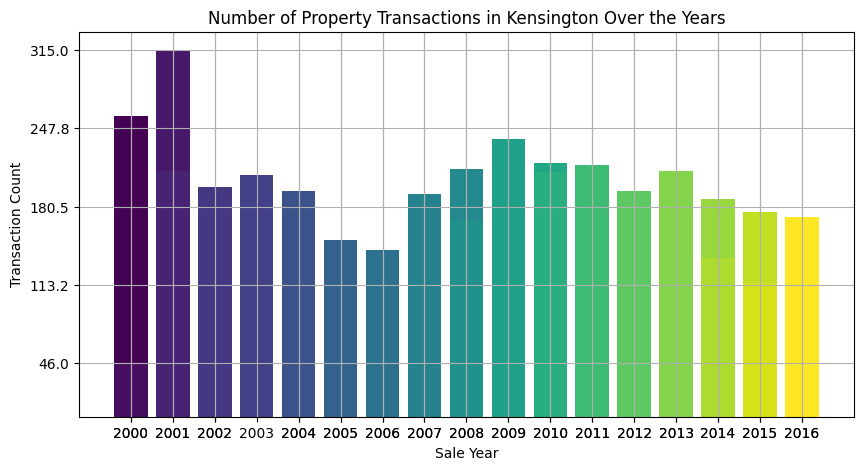

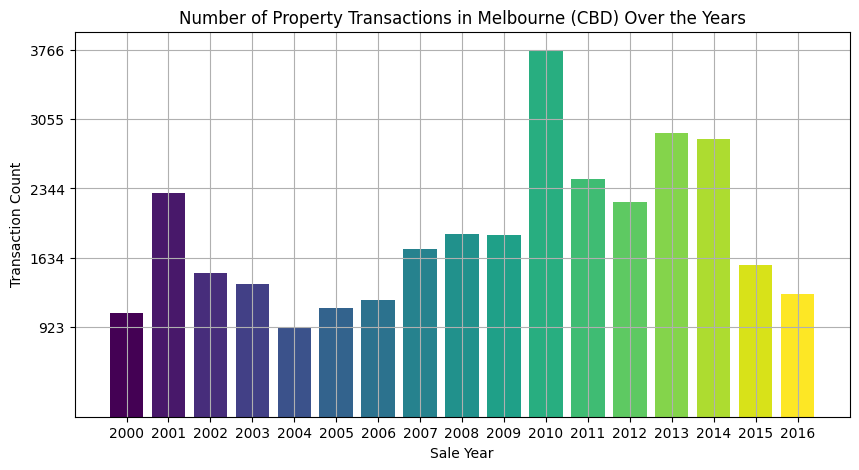

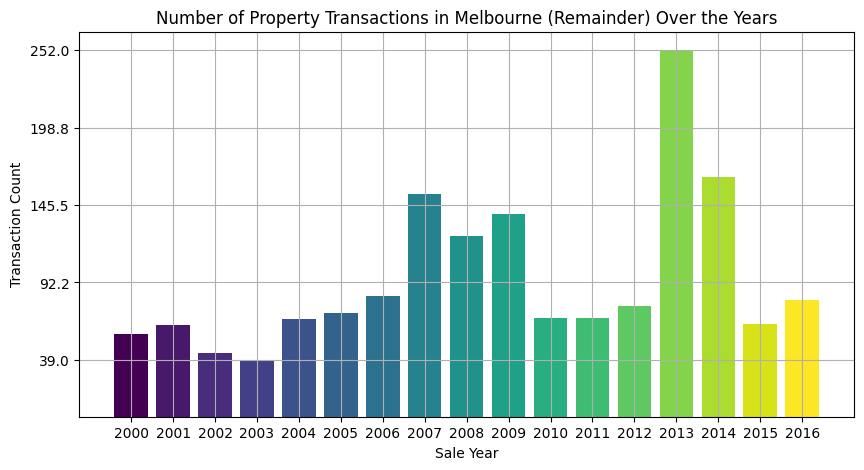

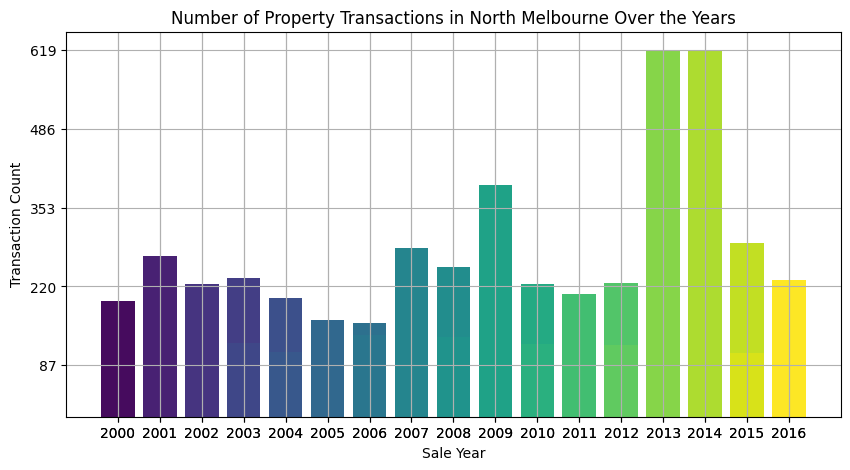

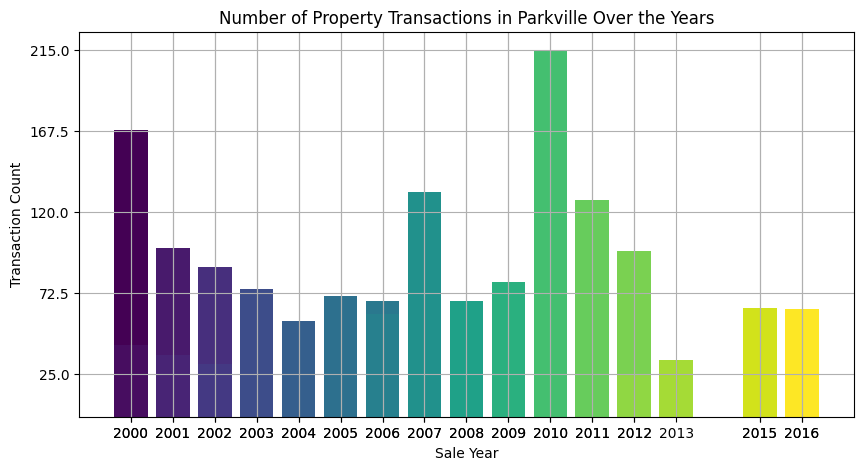

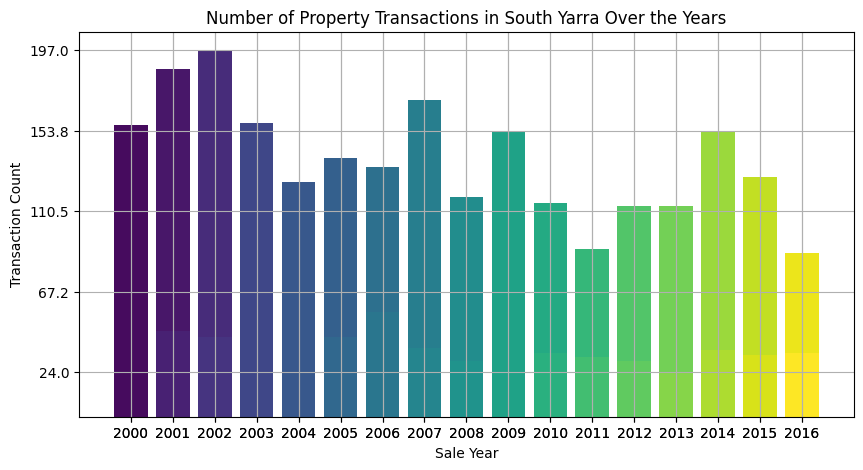

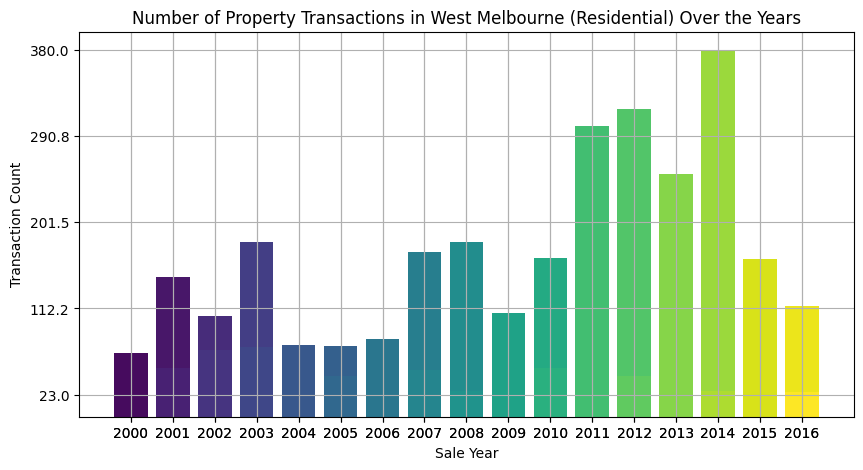

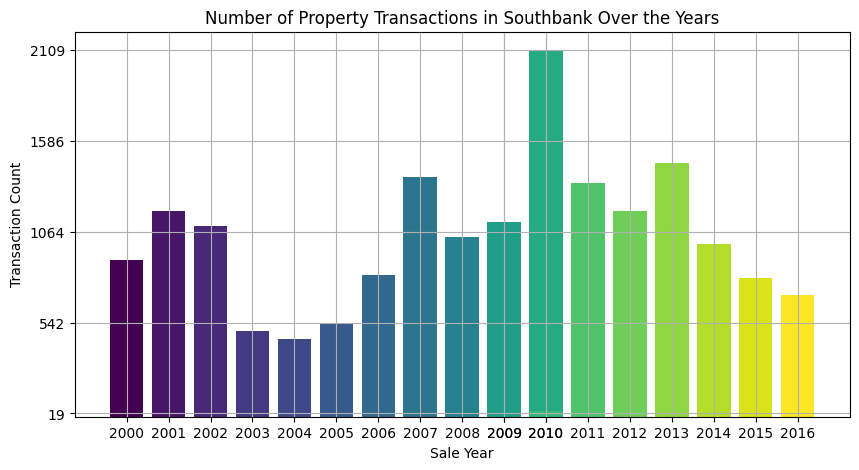

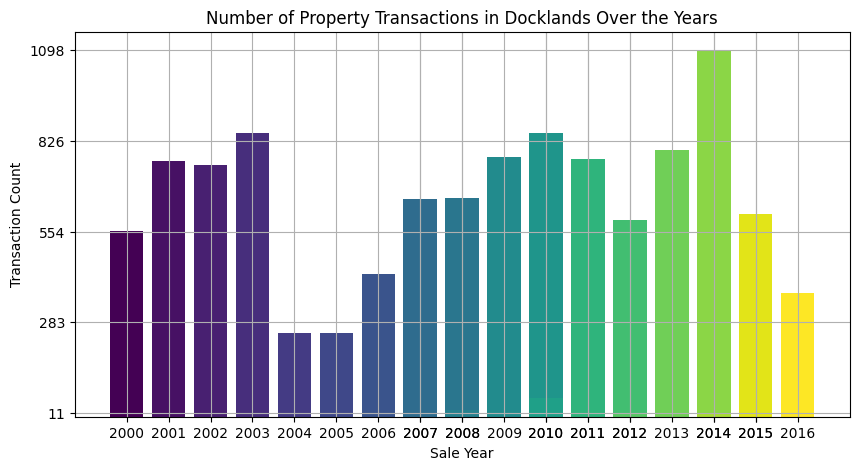

In [ ]:
for suburb_name in unique_small_areas:
    # Selecting  dataset for the current suburb and sort it by 'Sale_Year'
    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    plt.figure(figsize=(10, 5))

    # Plotting Median_Price against Sale_Year
    plt.bar(dataset['Sale_Year'], dataset['Transaction_Count'],  color=plt.cm.viridis(np.linspace(0, 1, len(dataset))))
    plt.title(f'Number of Property Transactions in {suburb_name} Over the Years')
    plt.xlabel('Sale Year')
    plt.ylabel('Transaction Count')
    plt.grid(True)

    plt.xticks(dataset['Sale_Year'])

    Transaction_Count = dataset['Transaction_Count']
    plt.yticks(np.linspace(Transaction_Count.min(), Transaction_Count.max(), 5))

    plt.show()


# Average number of transacions for each Suburb

In [ ]:
mean_transaction = {}

# Iterating over each suburb in the unique_small_areas list
for suburb_name in unique_small_areas:

    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    # Calculating the mean of the 'Transaction_Count' column for each suburb
    sub_mean_transaction = np.mean(dataset['Transaction_Count'])

    mean_transaction [suburb_name] = sub_mean_transaction

# Displaying the median of median prices for each suburb
for suburb_name, mean in mean_transaction.items():
    print(f" Average number of transacions in {suburb_name}: {mean:.2f}")

 Average number of transacions in Carlton: 207.47
 Average number of transacions in East Melbourne: 123.03
 Average number of transacions in Kensington: 172.39
 Average number of transacions in Melbourne (CBD): 1877.18
 Average number of transacions in Melbourne (Remainder): 94.88
 Average number of transacions in North Melbourne: 206.29
 Average number of transacions in Parkville: 70.42
 Average number of transacions in South Yarra: 87.47
 Average number of transacions in West Melbourne (Residential): 104.50
 Average number of transacions in Southbank: 928.47
 Average number of transacions in Docklands: 466.33


# Average Number of Property Transactions in Each Suburb

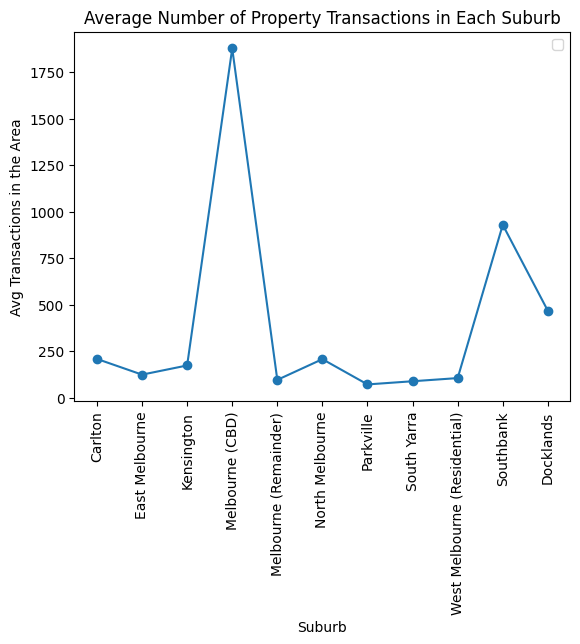

In [ ]:
mean_transaction_df = pd.DataFrame({'Suburb': list(mean_transaction.keys()),
                                'Transaction_Count': list(mean_transaction.values())})

# Plotting the Avg Number of Transactions in a Suburb

plt.scatter(mean_transaction_df['Suburb'], mean_transaction_df['Transaction_Count'])
plt.plot(mean_transaction_df['Suburb'], mean_transaction_df['Transaction_Count'], linestyle='-')
plt.title('Average Number of Property Transactions in Each Suburb')
plt.xlabel('Suburb')
plt.ylabel('Avg Transactions in the Area')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Median House Prices in each Suburb over the years

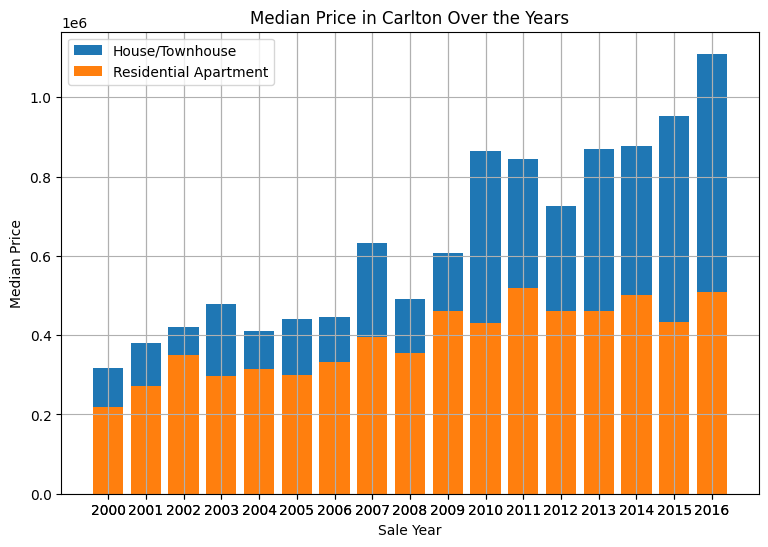

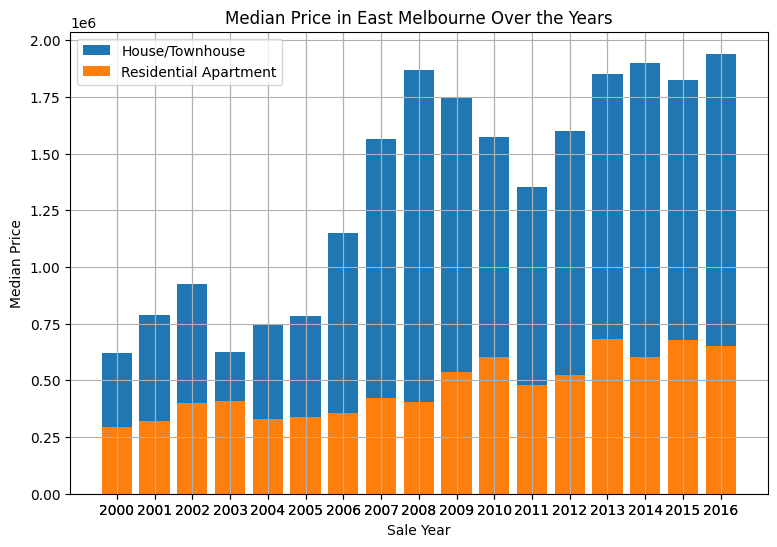

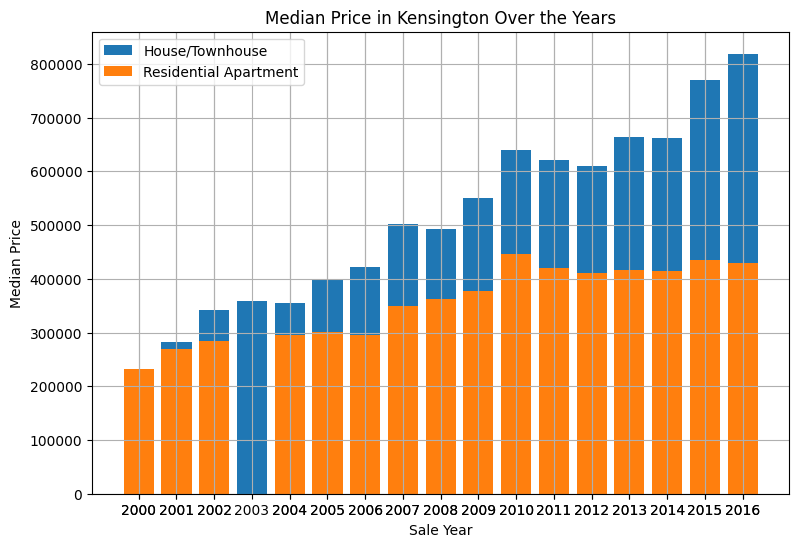

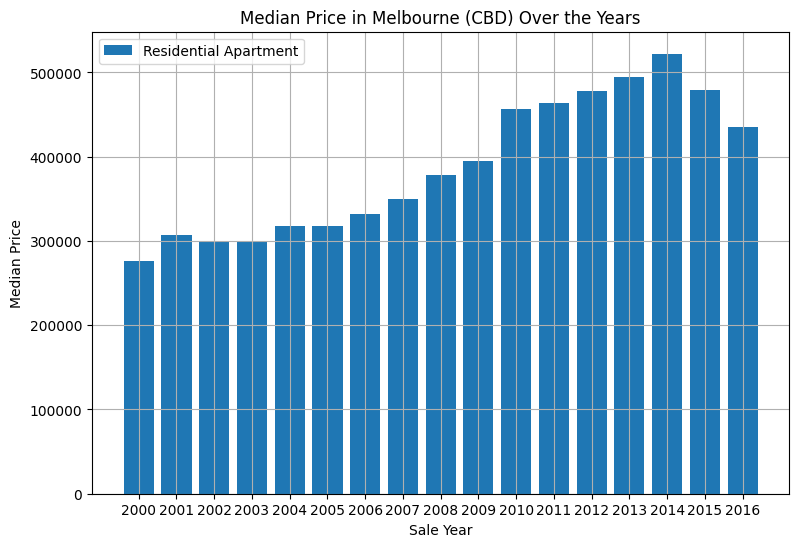

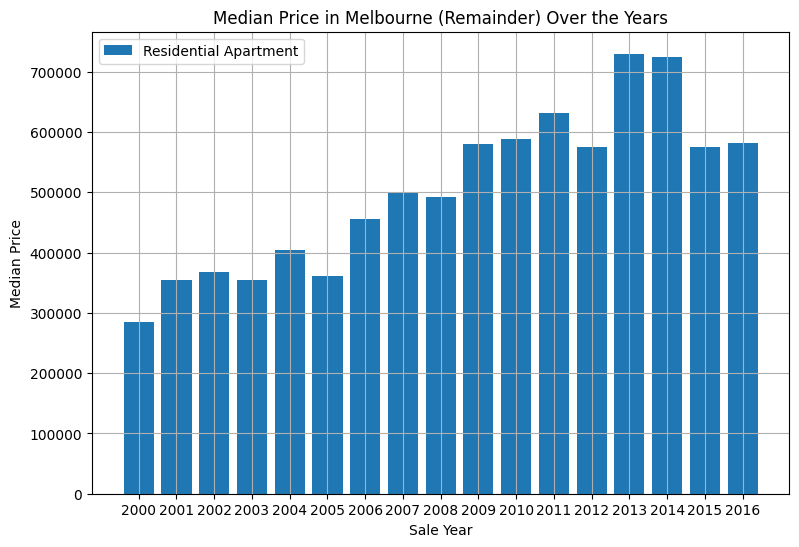

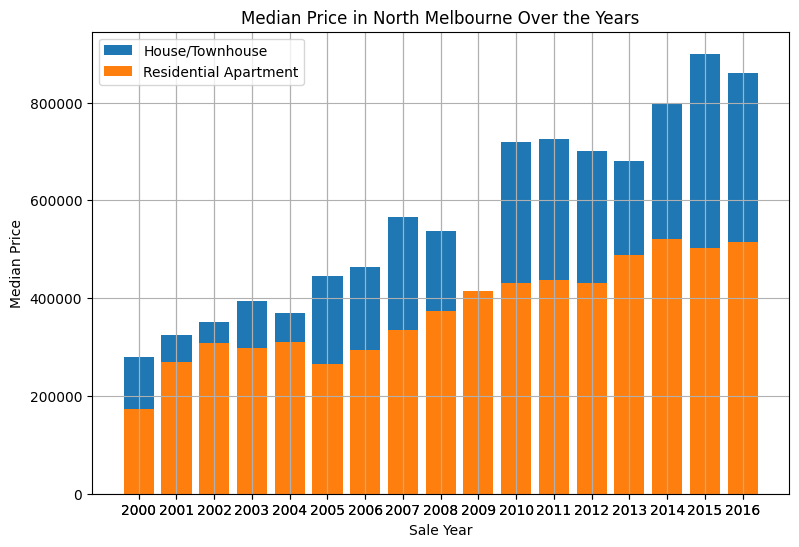

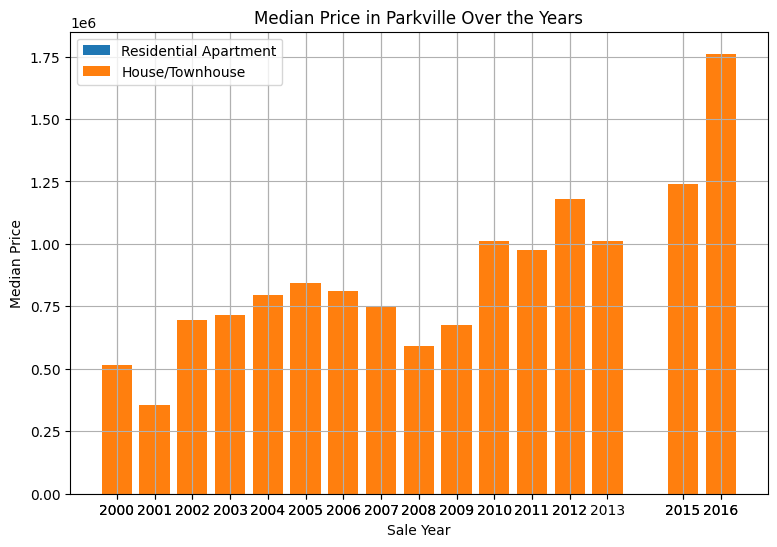

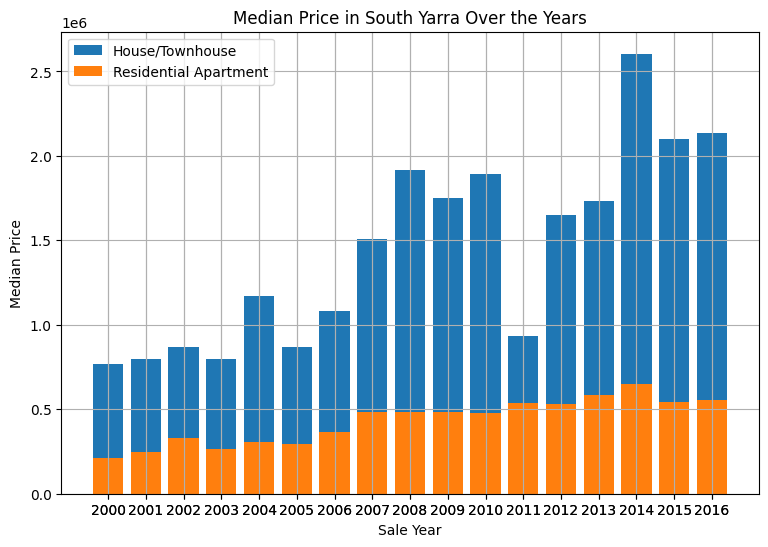

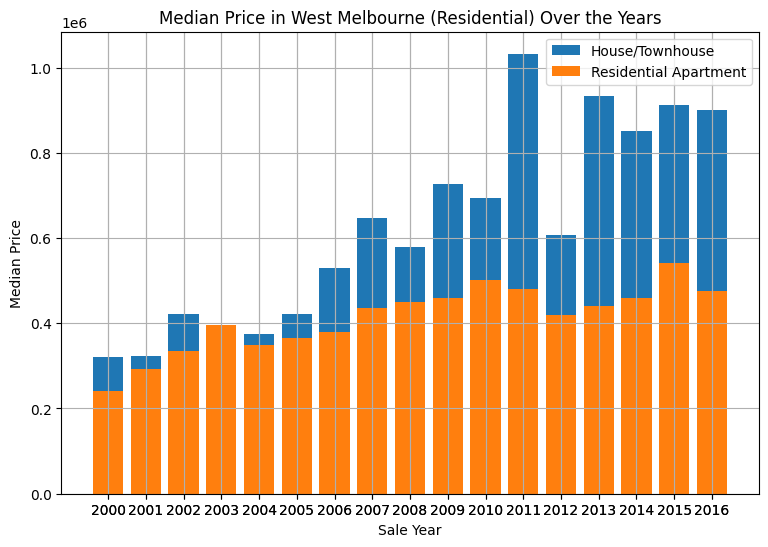

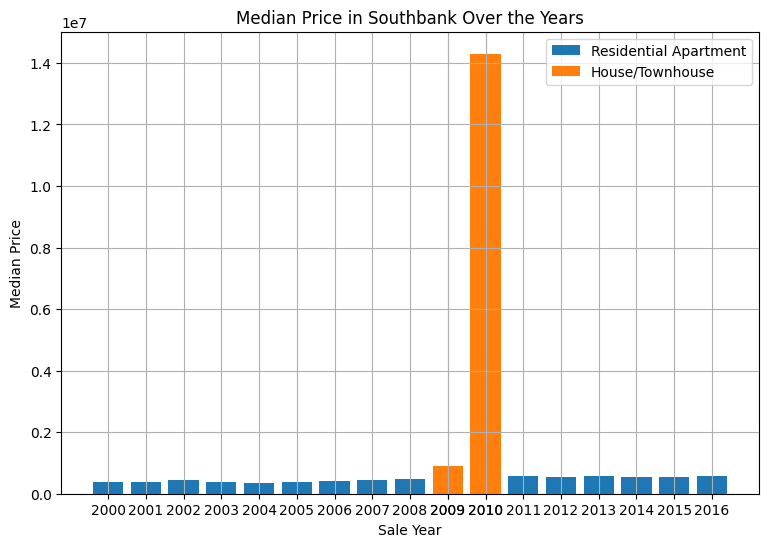

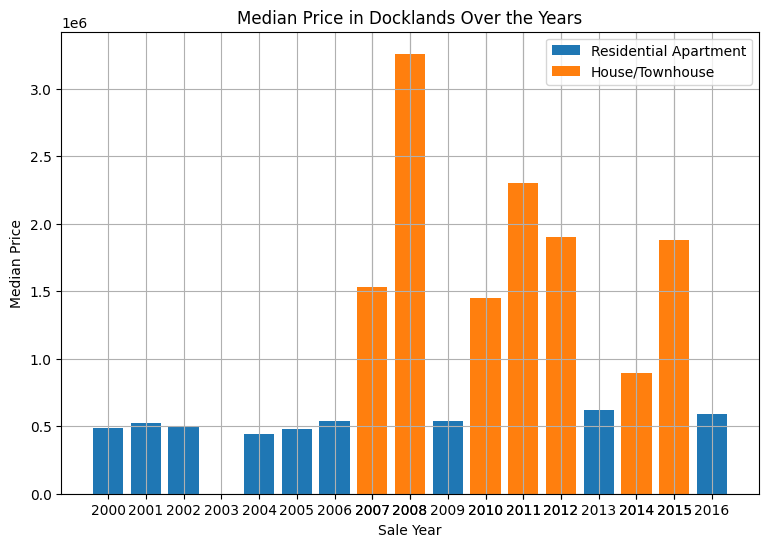

In [ ]:
for suburb_name in unique_small_areas:

    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    plt.figure(figsize=(9, 6))

    house_types = dataset['Type'].unique()

    bottom_values = np.zeros(len(dataset))

    # Plotting each house type
    for i, house_type in enumerate(house_types):

        house_data = dataset[dataset['Type'] == house_type]


        plt.bar(house_data['Sale_Year'], house_data['Median_Price'], label= house_type)



    plt.title(f'Median Price in {suburb_name} Over the Years')
    plt.xlabel('Sale Year')
    plt.ylabel('Median Price')
    plt.grid(True)
    plt.xticks(dataset['Sale_Year'])


    plt.legend()


    plt.show()


# Type of Houses for which Property Transactions took place in each Suburbs

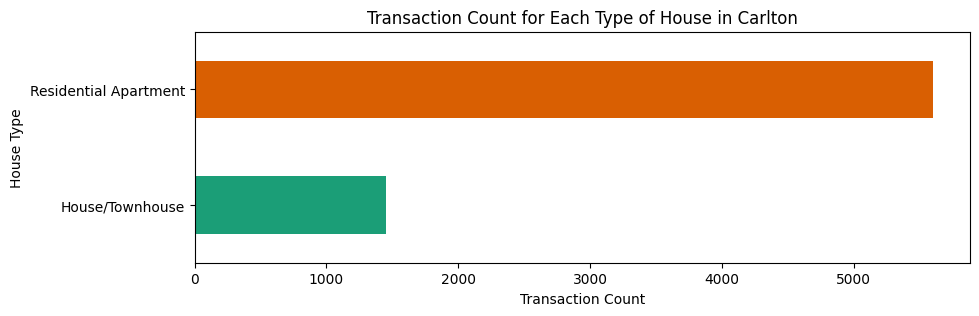

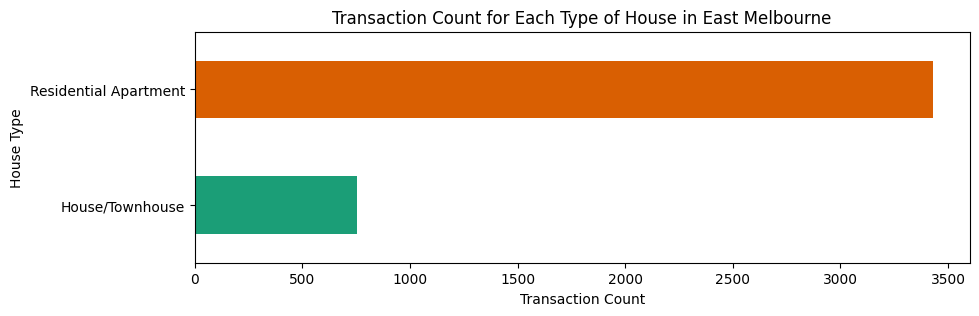

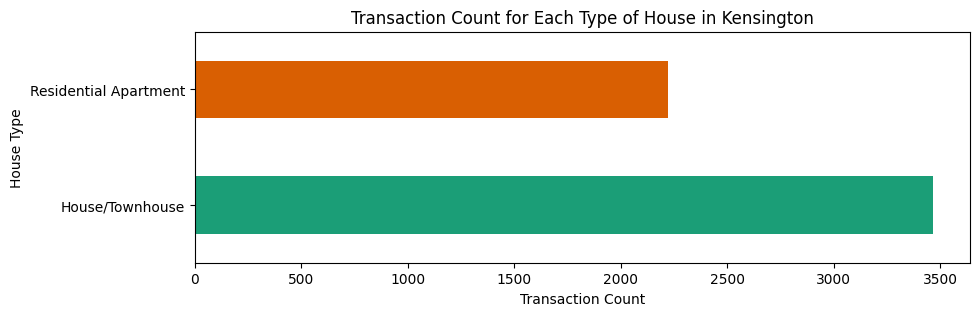

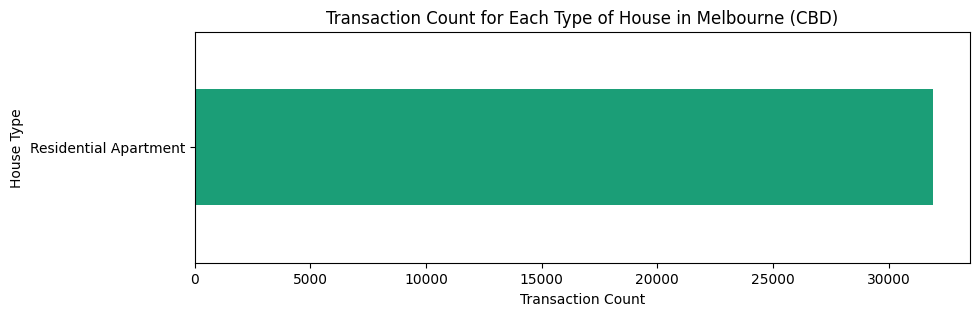

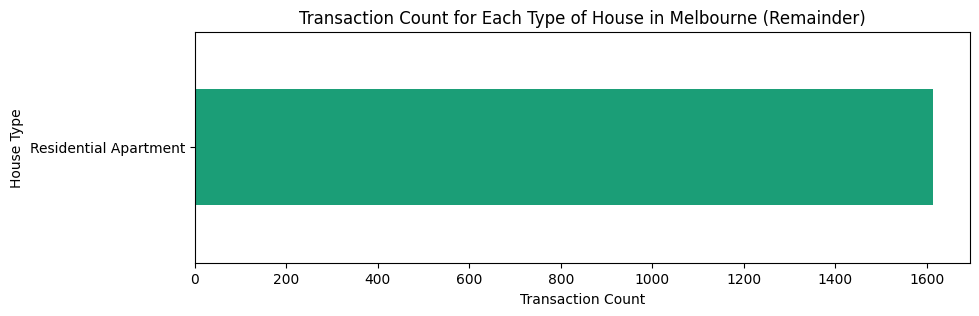

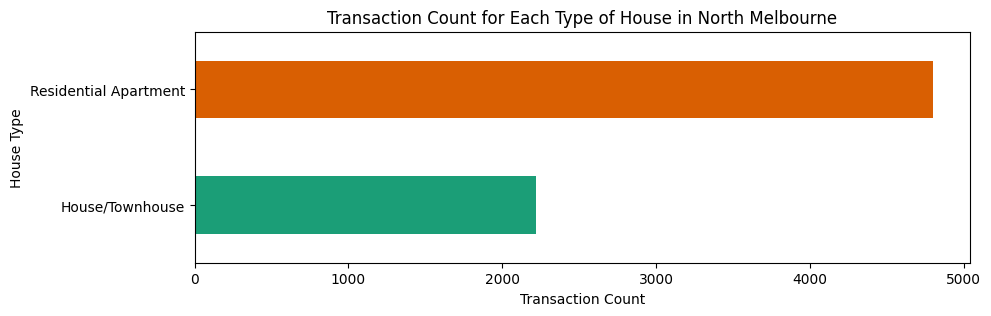

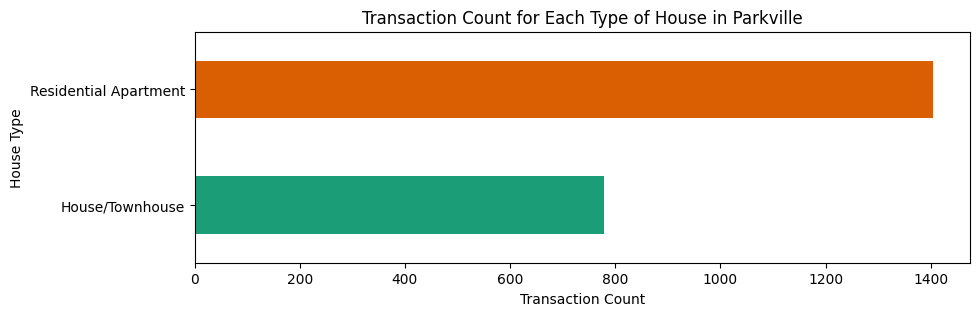

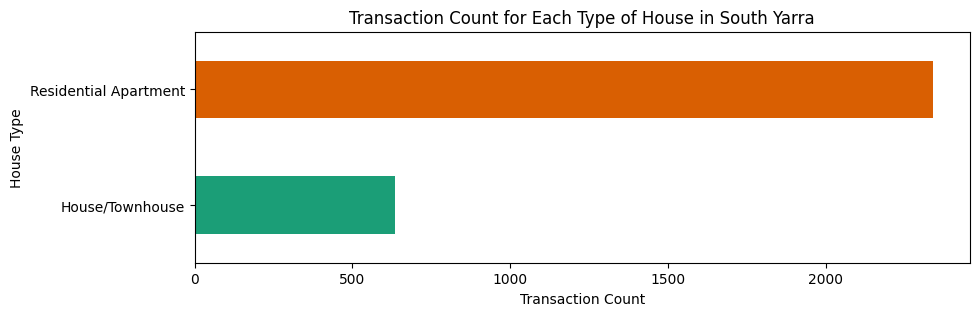

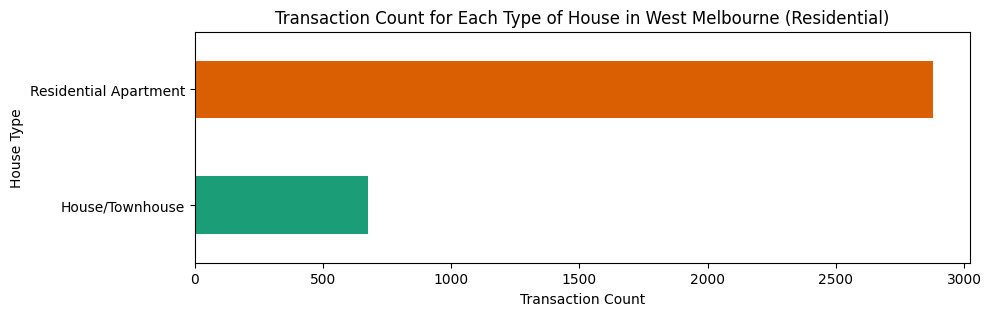

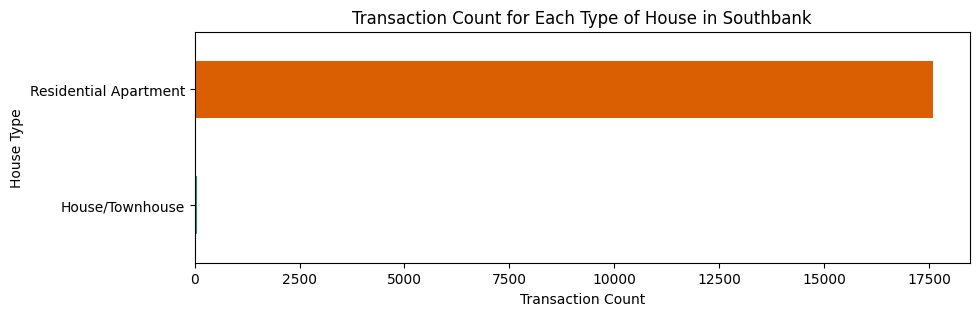

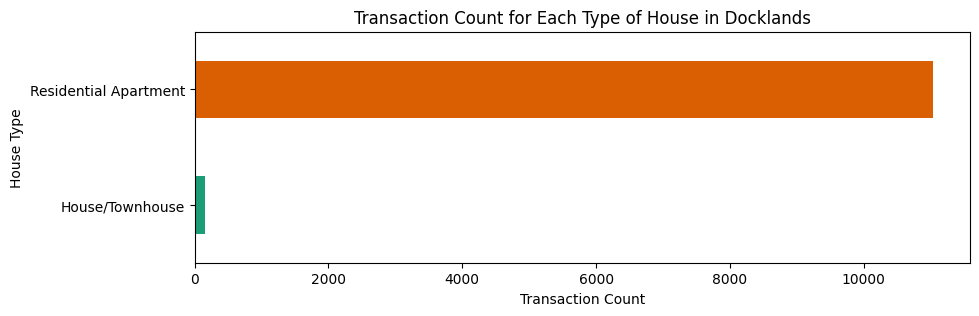

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns



for suburb_name in unique_small_areas:
    # Filter the DataFrame for the specific suburb
    suburb_data = housing_price[housing_price['Small_Area'] == suburb_name]
    plt.figure(figsize=(10,3))
    # Group by 'Type' and sum the 'Transaction_Count' for each type
    suburb_transaction = suburb_data.groupby('Type')['Transaction_Count'].sum()

    # Plot the transaction count for each type of house as a horizontal bar plot
    suburb_transaction.plot(kind='barh', color=sns.color_palette('Dark2'))

    # Set the title and labels

    plt.title(f'Transaction Count for Each Type of House in {suburb_name}')
    plt.xlabel('Transaction Count')
    plt.ylabel('House Type')

    # Show the plot
    plt.show()


# Type of Houses for which Property Transactions took place in each Suburbs over the years

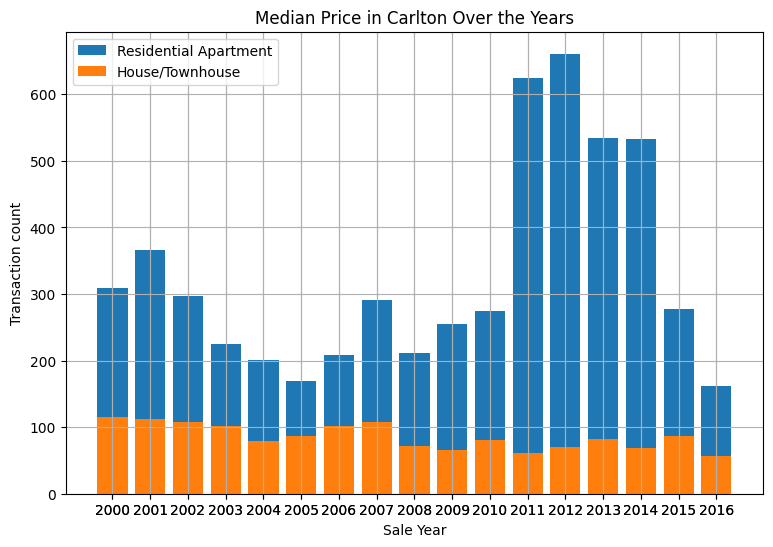

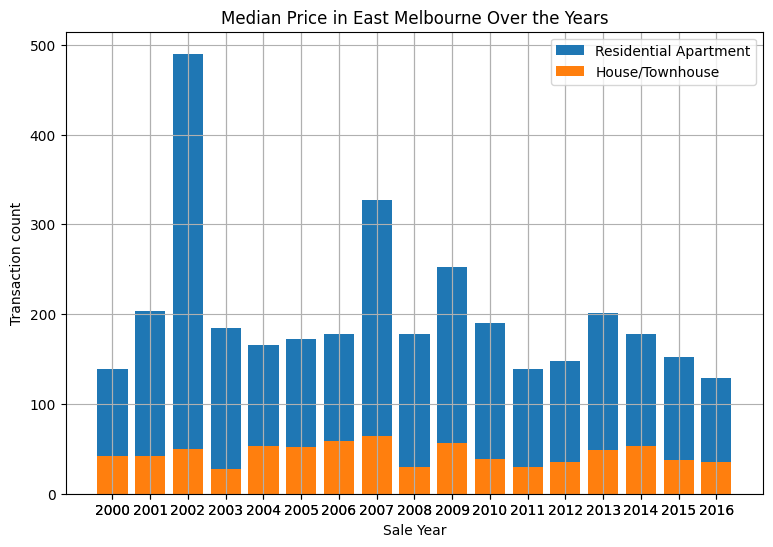

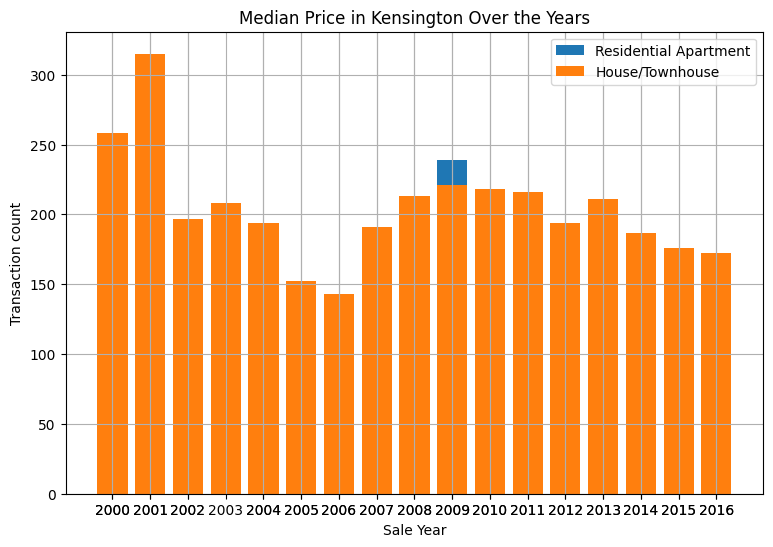

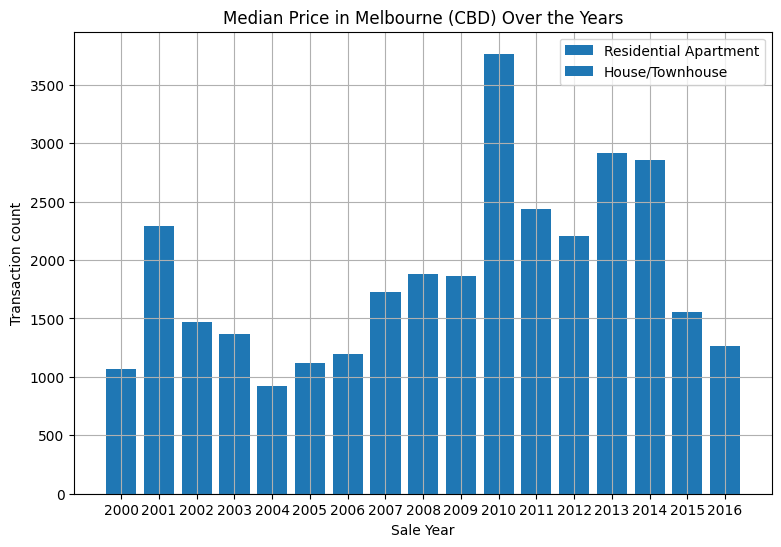

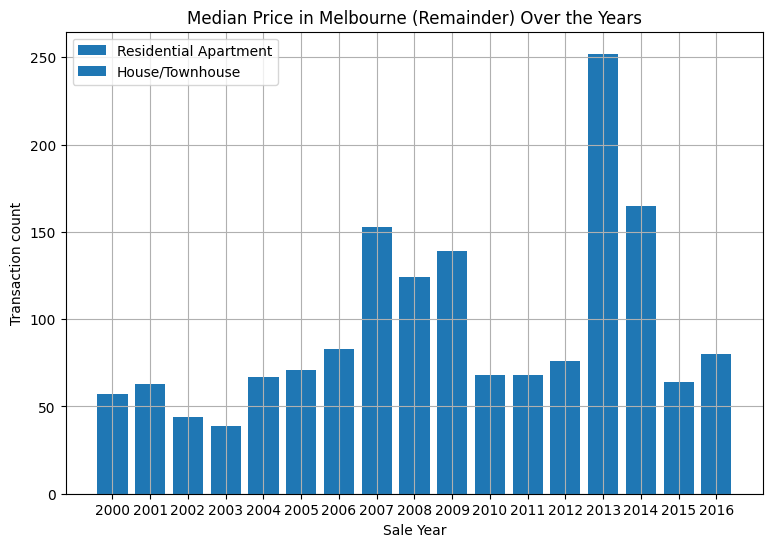

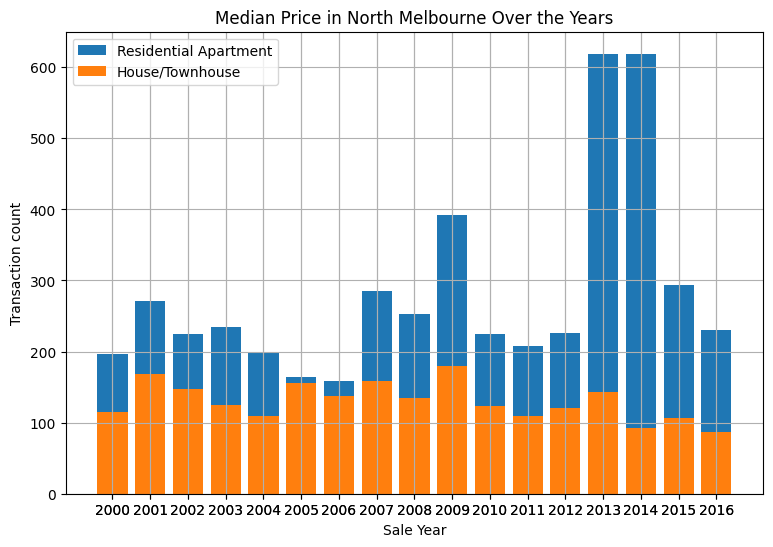

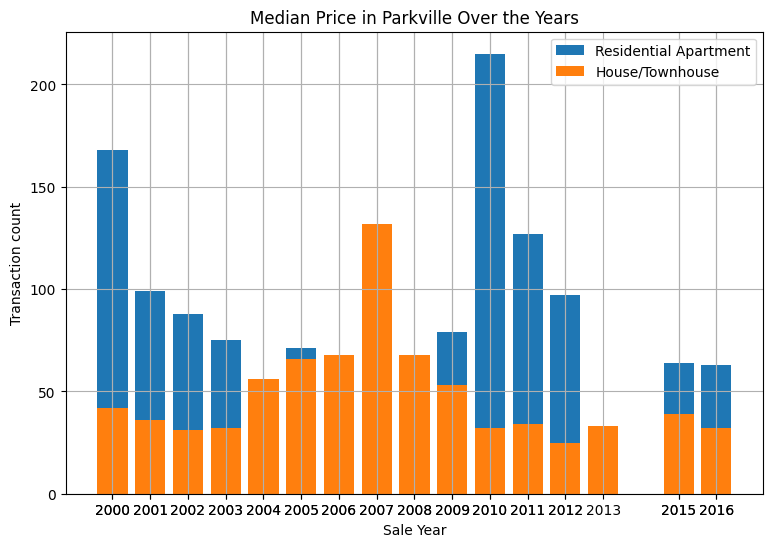

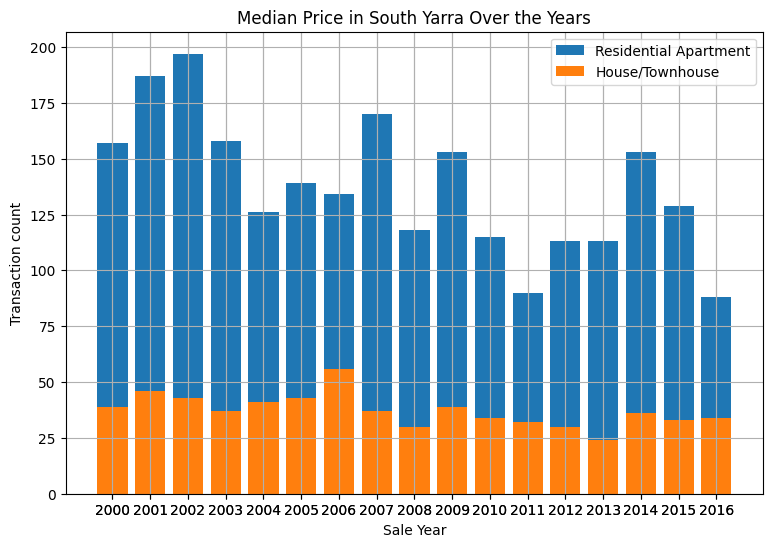

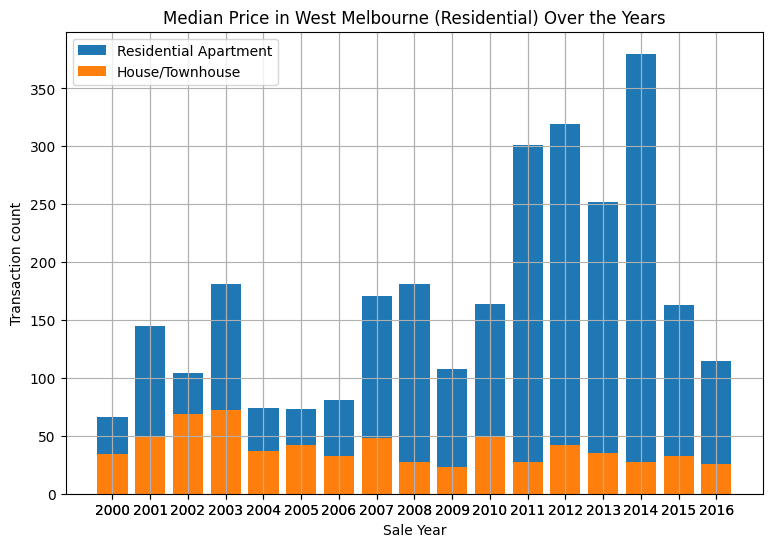

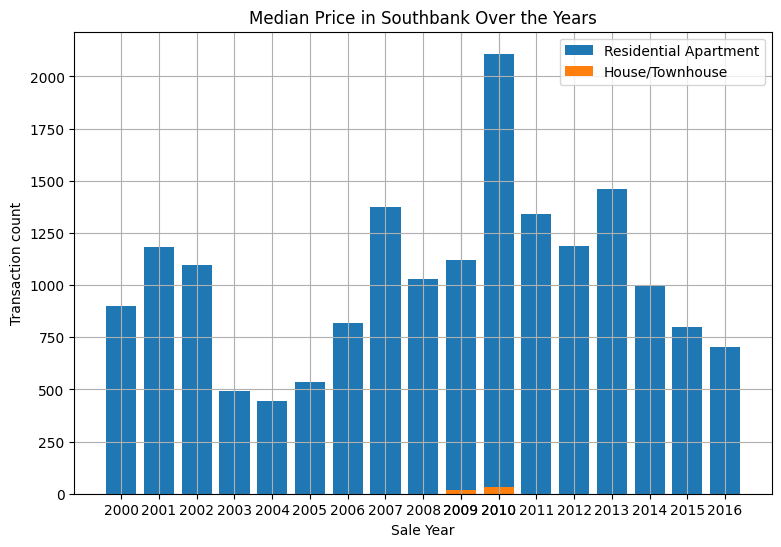

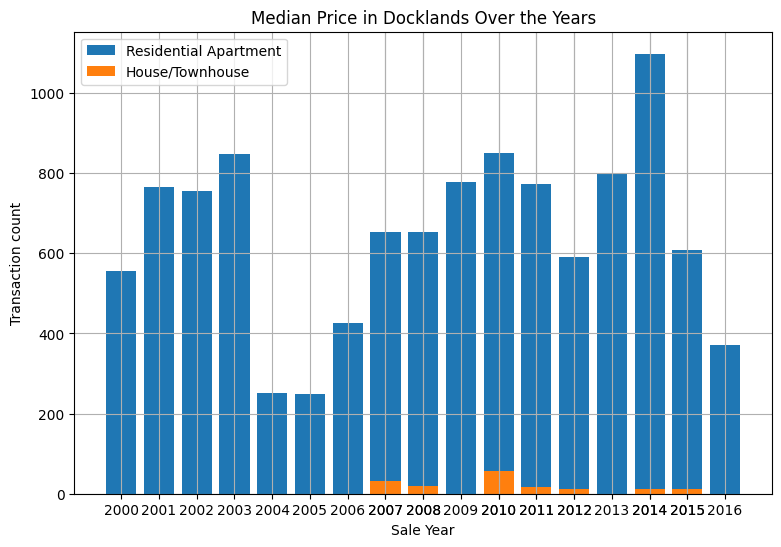

In [ ]:
for suburb_name in unique_small_areas:
    # Select the dataset for the current suburb and sort it by 'Sale_Year'
    dataset = suburb_datasets[suburb_name].sort_values(by='Sale_Year')

    plt.figure(figsize=(9, 6))

    # Plotting Sale Year vs Transaction count
    for i, house_type in enumerate(house_types):
        # Filter dataset for the current house type
        house_data = dataset[dataset['Type'] == house_type]

        # Plot the stacked bar for the current house type
        plt.bar(house_data['Sale_Year'], house_data['Transaction_Count'], label= house_type)



    plt.title(f'Median Price in {suburb_name} Over the Years')
    plt.xlabel('Sale Year')
    plt.ylabel('Transaction count')
    plt.grid(True)
    plt.xticks(dataset['Sale_Year'])

    # Show legend for house types
    plt.legend()

    # Show the plot for the current suburb
    plt.show()



---


# Loading the [Landmarks and Places of interest](https://https://data.melbourne.vic.gov.au/explore/dataset/landmarks-and-places-of-interest-including-schools-theatres-health-services-spor/table/) Dataset

In [50]:

lndmvrks = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/landmarks-and-places-of-interest-including-schools-theatres-health-services-spor/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")
lndmvrks = lndmvrks.copy()
lndmvrks.head()

,Theme,Sub Theme,Feature Name,Co-ordinates
0,Transport,Railway Station,Flemington Bridge Railway Station,"-37.7881645889621, 144.939277838304"
1,Mixed Use,Retail/Office/Carpark,Council House 2 (CH2),"-37.8142591432011, 144.966638432727"
2,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Carlton Gardens South,"-37.8060684577258, 144.971266479841"
3,Place of Worship,Church,Wesley Church,"-37.8101576446961, 144.968168215633"
4,Place of Worship,Church,St Augustines Church,"-37.8169741358546, 144.954862000132"
